In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

root_path = '/home/wanghuiqin/workspace/data/Titanic/'
dataSet = pd.read_csv(root_path+"train.csv")
print(dataSet.info())
print(pd.isnull(dataSet).sum())
test_data = pd.read_csv(root_path+"test.csv")
print(pd.isnull(test_data).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             

0    23
1    51
2    22
3    44
4    24
Name: Name_length, dtype: int64


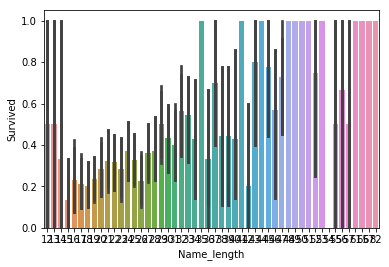

In [7]:
'''
Name feature extends:
name's length
'''
dataSet['Name_length'] = dataSet['Name'].map(lambda x: len(x)).astype(int)
sns.barplot(x='Name_length',y='Survived',data=dataSet)
plt.show()

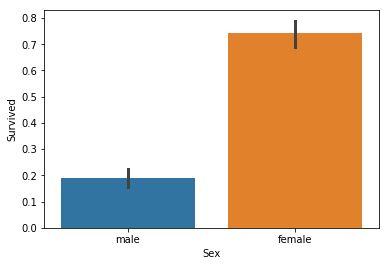

In [23]:
'''
Some Predictions:

Sex: Females are more likely to survive.
SibSp/Parch: People traveling alone are more likely to survive.
Age: Young children are more likely to survive.
Pclass: People of higher socioeconomic class are more likely to survive.
'''

sns.barplot(x='Sex',y='Survived',data=dataSet)
print('Percentage of females who survived:', dataSet['Survived'][dataSet['Sex']=='female'].value_counts(normalize=True)[1]*100)
print('Percentage of males who survived:', dataSet['Survived'][dataSet['Sex']=='male'].value_counts(normalize=True)[1]*100)
plt.show()
# result: female is more likely survived 

('Percentage of Pclass==1 who survived:', 62.962962962962962)
('Percentage of Pclass==2 who survived:', 47.282608695652172)
('Percentage of Pclass==3 who survived:', 24.236252545824847)


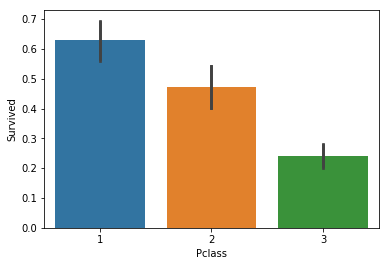

In [25]:
# https://zhuanlan.zhihu.com/p/27683042 study of sns
sns.barplot(x='Pclass',y='Survived',data=dataSet)
print('Percentage of Pclass==1 who survived:', dataSet['Survived'][dataSet['Pclass']==1].value_counts(normalize=True)[1]*100)
print('Percentage of Pclass==2 who survived:', dataSet['Survived'][dataSet['Pclass']==2].value_counts(normalize=True)[1]*100)
print('Percentage of Pclass==3 who survived:', dataSet['Survived'][dataSet['Pclass']==3].value_counts(normalize=True)[1]*100)
plt.show()
# class == 1  be more likely survived

('Percentage of SibSp==0 who survived:', 34.539473684210527)
('Percentage of SibSp==1 who survived:', 53.588516746411486)
('Percentage of SibSp==2 who survived:', 46.428571428571431)


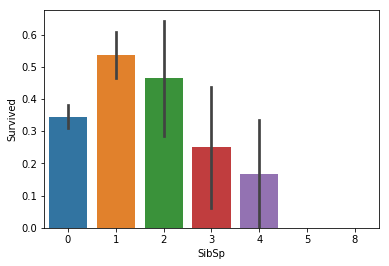

In [27]:
sns.barplot(x='SibSp',y='Survived',data=dataSet)
print('Percentage of SibSp==0 who survived:', dataSet['Survived'][dataSet['SibSp']==0].value_counts(normalize=True)[1]*100)
print('Percentage of SibSp==1 who survived:', dataSet['Survived'][dataSet['SibSp']==1].value_counts(normalize=True)[1]*100)
print('Percentage of SibSp==2 who survived:', dataSet['Survived'][dataSet['SibSp']==2].value_counts(normalize=True)[1]*100)
plt.show()

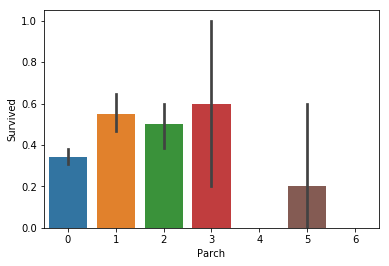

In [28]:
sns.barplot(x='Parch',y='Survived',data=dataSet)
plt.show()

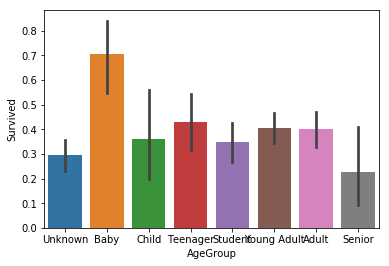

In [32]:
# age
dataSet['Age'] = dataSet['Age'].fillna(-0.5)
bins = [-1,0,5,12,18,24,35,60,np.inf]
labels = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
dataSet['AgeGroup'] = pd.cut(dataSet['Age'],bins,labels=labels)
sns.barplot(x='AgeGroup',y='Survived',data=dataSet)
plt.show()
# baby 


('Percentage of CabinBool==1 who survived:', 66.666666666666657)
('Percentage of CabinBool==0 who survived:', 29.985443959243085)


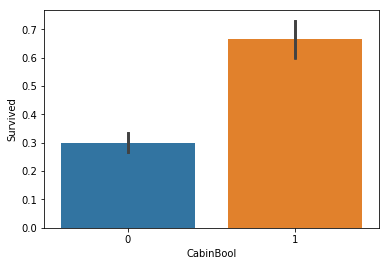

In [34]:
dataSet['CabinBool'] = (dataSet['Cabin'].notnull().astype('int'))
print('Percentage of CabinBool==1 who survived:', dataSet['Survived'][dataSet['CabinBool']==1].value_counts(normalize=True)[1]*100)
print('Percentage of CabinBool==0 who survived:', dataSet['Survived'][dataSet['CabinBool']==0].value_counts(normalize=True)[1]*100)
sns.barplot(x='CabinBool',y='Survived',data=dataSet)
plt.show()
# not null

In [2]:
#analysis
class_tag = dataSet['Survived']
print(class_tag.value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [3]:
x = [dataSet[dataSet.Sex=='male']['Sex'].size,dataSet[dataSet.Sex=='female']['Sex'].size]
y = [dataSet[(dataSet['Survived']==1) & (dataSet['Sex']=='male')]['Sex'].size,dataSet[(dataSet['Survived']==1) & (dataSet['Sex']=='female')]['Sex'].size]
print("all male:",x[0],"all female:",x[1])
print("survived male:",y[0],'survived female:',y[1])


('all male:', 577, 'all female:', 314)
('survived male:', 109, 'survived female:', 233)


In [4]:
sex_analy = dataSet.loc[:,['Survived','Sex']].groupby(['Sex'])
print(sex_analy.count())
Pclass_analy = dataSet[dataSet['Survived']==1]['Pclass']
print(Pclass_analy.value_counts())
Embarked_analy = dataSet[dataSet['Survived']==1]['Embarked']
print(Embarked_analy.value_counts())

        Survived
Sex             
female       314
male         577
1    136
3    119
2     87
Name: Pclass, dtype: int64
S    217
C     93
Q     30
Name: Embarked, dtype: int64


In [6]:
print(dataSet['Cabin'].value_counts())
print(len(dataSet['Cabin'].value_counts()))

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          